In [1]:
import os
import random
import torch
import numpy as np
import pickle as pkl
from analysis import *
import argparse
from sys import platform
import matplotlib

In [2]:
torch.manual_seed(12)
torch.cuda.manual_seed(12)
np.random.seed(12)
torch.backends.cudnn.deterministics = True
torch.set_num_threads(1)

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())


print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
NVIDIA TITAN V


In [4]:
# iv: image option
length = 440
channel = 128
min_CNN = 200
n_classes = 40
classes = range(n_classes)


In [5]:
if platform == "linux" or platform == "linux2":
    torch_models_dir = r"/media/titan/AI Research1/Data/CVPR2017"
elif platform == "win32":
    torch_models_dir = r"D:\Data\CVPR2021-02785\CVPR2021-02785\preprocessed\torch_models"
block_splits_all, block_splits_single, eeg_14_70, eeg_55_95, eeg_5_95, eeg_raw = os.listdir(torch_models_dir)
print(os.listdir(torch_models_dir))

['block_splits_by_image_all.pth', 'block_splits_by_image_single.pth', 'eeg_14_70_std.pth', 'eeg_55_95_std.pth', 'eeg_5_95_std.pth', 'eeg_signals_raw_with_mean_std.pth']


In [6]:
eeg_dataset = os.path.join(torch_models_dir, eeg_55_95)
splits_all_path = os.path.join(torch_models_dir, block_splits_all)
splits_single_path = os.path.join(torch_models_dir, block_splits_single)
# splits_path = os.path.join(torch_models_dir, splits_shuffled_path)
print(eeg_dataset,'\n', splits_all_path, '\n', splits_single_path)

/media/titan/AI Research1/Data/CVPR2017/eeg_55_95_std.pth 
 /media/titan/AI Research1/Data/CVPR2017/block_splits_by_image_all.pth 
 /media/titan/AI Research1/Data/CVPR2017/block_splits_by_image_single.pth


In [7]:
splits_all = torch.load(splits_all_path)
splits_single = torch.load(splits_single_path)

In [8]:
print(len(splits_all['splits']))
print(len(splits_all['splits'][0]))

print(len(splits_all['splits'][5]['train']))
print(len(splits_all['splits'][5]['val']))
print(len(splits_all['splits'][5]['test']))
print(splits_all['splits'][0]['train'][:40])
print(splits_all['splits'][1]['train'][:40])
print(splits_all['splits'][2]['train'][:10])
print(splits_all['splits'][3]['train'][:10])


6
3
7984
1996
1985
[0, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 29, 33, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 51, 52, 54, 55]
[1, 2, 3, 4, 6, 8, 9, 12, 13, 20, 25, 26, 27, 28, 30, 32, 33, 35, 37, 38, 39, 40, 44, 45, 46, 50, 52, 54, 56, 58, 59, 60, 62, 65, 68, 72, 73, 74, 76, 81]
[2, 3, 4, 5, 6, 7, 8, 10, 11, 13]
[1, 2, 4, 7, 9, 10, 12, 13, 14, 15]


In [9]:
# print(splits_single)
print(len(splits_single['splits'][0]['train']))
print(len(splits_single['splits'][0]['val']))
print(len(splits_single['splits'][0]['test']))

669
167
164


In [10]:
eeg_loaded = torch.load(eeg_dataset)

In [11]:
print(len(eeg_loaded))
print(eeg_loaded.keys())
dataset, labels, images = [eeg_loaded[k] for k in eeg_loaded.keys()]
print(len(labels))
print(len(images))
print(len(dataset))

print(labels)
print(images[0])
print(dataset[0]['eeg'].shape)
print(dataset[0])

3
dict_keys(['dataset', 'labels', 'images'])
40
1996
11965
['n02389026', 'n03888257', 'n03584829', 'n02607072', 'n03297495', 'n03063599', 'n03792782', 'n04086273', 'n02510455', 'n11939491', 'n02951358', 'n02281787', 'n02106662', 'n04120489', 'n03590841', 'n02992529', 'n03445777', 'n03180011', 'n02906734', 'n07873807', 'n03773504', 'n02492035', 'n03982430', 'n03709823', 'n03100240', 'n03376595', 'n03877472', 'n03775071', 'n03272010', 'n04069434', 'n03452741', 'n03792972', 'n07753592', 'n13054560', 'n03197337', 'n02504458', 'n02690373', 'n03272562', 'n04044716', 'n02124075']
n02951358_31190
torch.Size([128, 500])
{'eeg': tensor([[-2.9181e-02, -2.9862e-01, -5.1430e-01,  ..., -8.4631e-01,
         -4.8041e-01, -2.8394e-02],
        [-2.4111e-02, -1.6960e-01, -2.8707e-01,  ..., -5.6212e-01,
         -3.2735e-01, -3.5872e-02],
        [ 4.7802e-02,  3.7646e-01,  6.4149e-01,  ...,  4.3011e-01,
          2.4678e-01,  4.1414e-02],
        ...,
        [ 2.1368e-02,  1.2907e-01,  1.9428e-01,  ..

In [12]:
opt = {
    # Dataset options
#     "iv": "image",
#     "offset": None,
    "results_file": "results.pkl",
    "subject": 0,
    "time_low": 20,
    "time_high": 460,
#     "run": "none",
    "eeg_dataset": eeg_dataset,
    "model_type": "model10",
    "splits_path": splits_all_path,
    "split_num": 0,
    "split_name": "train",
#     "fold": 5,
    #Training options
    "batch_size": 16,
    "optim": "Adam",
    "learning_rate": 0.001,
    "learning_rate_decay_by": 0.5,
    "learning_rate_decay_every": 10,
    "epochs": 100,
    "GPUindex": 0,
    "kind":"from-scratch",
    #Backend options
    "no_cuda": False,
    "classifier": None
}
opt = argparse.Namespace(**opt)
print(opt.time_low)

20


In [15]:
%load_ext autoreload
%autoreload 2
from torch.utils.data import DataLoader
# from data_loader import EEGDataset, Splitter, SplitterWithData
from data_loader_CVPR2017 import EEGDataset, Splitter
from EEG_Encoder.LSTM import classifier_LSTM
from EEG_Encoder.CNN import classifier_CNN
from EEG_Encoder.EEGNet import classifier_EEGNet
from EEG_Encoder.SyncNet import classifier_SyncNet
from EEG_Encoder.EEGChannelNet import classifier_EEGChannelNet
from EEG_Encoder.net_generator import Classifier
from EEG_Encoder.net_trainer import net_trainer
from matplotlib import pyplot as plt
from p_values import *
from torchinfo import summary

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def load_dataset(
#              offset,
             eeg_dataset,
             splits_path,
             split_num, # (0-5) - 6 fold cross validation
             split_name,
#              total, 
#              classes,
#              classifier,
             batch_size,
#              GPUindex,
#              length, # 500
#              channel, # 128
#              min_CNN,
             opt,
             kind="from-scratch"):        
    # Load dataset
    dataset = EEGDataset(opt, eeg_dataset)
    print("DONE: LOAD DATASET")
#     # Create loaders for LSTM/MLP/CNN/SCNN/EEGNet/SyncNet/EEGChannelNet
#     if kind=="from-scratch":
#         relabel = False
#     if kind=="incremental":
#         relabel = False
#     if kind=="no-model-file":
#         relabel = True
    splitter = {split: Splitter(dataset,
                    splits_path,
                    split_num,
                    split_name = split) for split in ["train", "val", "test"]}
    loaders = {split: DataLoader(
                        splitter[split],
                        batch_size = batch_size,
                        drop_last = False,
                        shuffle = True)
                    for split in ["train", "val", "test"]}
    channel_idx = None    
    print("DONE: Create loaders for model")            
    return dataset, loaders, splitter

In [17]:
# Options
opt.classifier = "EEGChannelNet"
opt.batch_size = 16
# opt.kind = "from-scratch"
# opt.run = "imagenet40-1000"
# opt.fold = 5

In [18]:
dataset, loaders, splitter = load_dataset(
#              offset,
             opt.eeg_dataset,
             opt.splits_path,
             opt.split_num, # (0-5) - 6 fold cross validation
             opt.split_name,
#              total, 
#              classes,
#              classifier,
             opt.batch_size,
#              GPUindex,
#              length, # 500
#              channel, # 128
#              min_CNN,
             opt,
             opt.kind)

DONE: LOAD DATASET
DONE: Create loaders for model


In [19]:
# loaders: divide the splits data in each fold with batch_size
# Each fold has {train: 8000 idx, val: 2000 idx, test: 2000 idx}
# Each loader batch has {train: 2000 idx, val: 250 idx, test: 250 idx}
print(type(dataset))
print(type(loaders))
print(len(loaders), [len(loaders[name]) for name in ["train", "val", "test"] ])
for i, (input, target) in enumerate(loaders["train"]):
    if i<20:
        print(f"{i+1}: Target size: {target.size()}; input size: {input.size()}")
for i in range(0, 40):
    eeg, label_val = splitter["val"][i]
    eeg, label_train = splitter["train"][i]
    print(f"{i+1}: Label val: {label_val}; label train: {label_train}")


<class 'data_loader_CVPR2017.EEGDataset'>
<class 'dict'>
3 [498, 125, 125]
1: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
2: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
3: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
4: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
5: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
6: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
7: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
8: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
9: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
10: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
11: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
12: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
13: Target size: torch.Size([16]); input size:

In [20]:
net, nonclasses = Classifier(
                 n_classes,
                 classes,
                 opt.classifier,
                 opt.GPUindex,
                 length,
                 channel,
                 min_CNN,
                 opt.kind)
# print(len(nonclasses))
summary(net, input_size =(1,128, 440))

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


DONE: CREATE TORCH CLASSIFIER
classifier_EEGChannelNet(
  (encoder): FeaturesExtractor(
    (temporal_block): TemporalBlock(
      (layers): ModuleList(
        (0): ConvLayer2D(
          (norm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv): Conv2d(1, 10, kernel_size=(1, 33), stride=(1, 2), padding=(0, 16))
          (drop): Dropout2d(p=0.2, inplace=False)
        )
        (1): ConvLayer2D(
          (norm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv): Conv2d(1, 10, kernel_size=(1, 33), stride=(1, 2), padding=(0, 32), dilation=(1, 2))
          (drop): Dropout2d(p=0.2, inplace=False)
        )
        (2): ConvLayer2D(
          (norm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv): Conv2d(1, 10, kernel_size=(1, 33), stride=

Layer (type:depth-idx)                        Output Shape              Param #
classifier_EEGChannelNet                      [1, 40]                   --
├─FeaturesExtractor: 1-1                      [1, 50, 1, 10]            --
│    └─TemporalBlock: 2-1                     [1, 40, 128, 220]         --
│    │    └─ModuleList: 3-1                   --                        1,368
│    └─SpatialBlock: 2-2                      [1, 200, 64, 220]         --
│    │    └─ModuleList: 3-2                   --                        532,520
│    └─ModuleList: 2-3                        --                        --
│    │    └─Sequential: 3-3                   [1, 200, 31, 109]         1,081,400
│    │    └─Sequential: 3-4                   [1, 200, 15, 54]          1,081,400
│    │    └─Sequential: 3-5                   [1, 200, 7, 26]           1,081,400
│    │    └─Sequential: 3-6                   [1, 200, 3, 12]           1,081,400
│    └─ConvLayer2D: 2-4                       [1, 50, 1, 10

In [22]:
model_path = (   opt.classifier+
                  "-"+
                  str(length)+
                  "-"+
                  str(channel) + "_55_95" )
results_path = (  "results_"+ opt.classifier+
                  "-"+
                  str(length)+
                  "-"+
                  str(channel)+ "_55_95"  )
print(model_path)
print(results_path)

EEGChannelNet-440-128_55_95
results_EEGChannelNet-440-128_55_95


In [23]:
print(opt)

Namespace(results_file='results.pkl', subject=0, time_low=20, time_high=460, eeg_dataset='/media/titan/AI Research1/Data/CVPR2017/eeg_55_95_std.pth', model_type='model10', splits_path='/media/titan/AI Research1/Data/CVPR2017/block_splits_by_image_all.pth', split_num=0, split_name='train', batch_size=16, optim='Adam', learning_rate=0.001, learning_rate_decay_by=0.5, learning_rate_decay_every=10, epochs=100, GPUindex=0, kind='from-scratch', no_cuda=False, classifier='EEGChannelNet')


In [24]:
channel_idx=None
non_classes=None
if opt.kind=="from-scratch":
    results = net_trainer(
            net,
            loaders,
            opt,
            channel_idx,
            nonclasses,
            None,
            True,
            model_path)

Epoch 1
Train Batch 100 (every 100 batch): Loss=3.7295; accuracy=0.0331
Train Batch 200 (every 100 batch): Loss=3.7053; accuracy=0.0306
Train Batch 300 (every 100 batch): Loss=3.7087; accuracy=0.0298
Train Batch 400 (every 100 batch): Loss=3.6251; accuracy=0.0270
Epoch 1 summary: train_loss: 3.7101 | train_acc: 0.0277 | val_loss: 3.7245 | val_acc: 0.0205
Epoch 2
Train Batch 100 (every 100 batch): Loss=3.6778; accuracy=0.0275
Train Batch 200 (every 100 batch): Loss=3.6701; accuracy=0.0266
Train Batch 300 (every 100 batch): Loss=3.7374; accuracy=0.0244
Train Batch 400 (every 100 batch): Loss=3.7025; accuracy=0.0253
Epoch 2 summary: train_loss: 3.6951 | train_acc: 0.0264 | val_loss: 3.6962 | val_acc: 0.0150
Epoch 3
Train Batch 100 (every 100 batch): Loss=3.6771; accuracy=0.0269
Train Batch 200 (every 100 batch): Loss=3.6593; accuracy=0.0228
Train Batch 300 (every 100 batch): Loss=3.6921; accuracy=0.0265
Train Batch 400 (every 100 batch): Loss=3.6919; accuracy=0.0253
Epoch 3 summary: train

Train Batch 100 (every 100 batch): Loss=1.5528; accuracy=0.3681
Train Batch 200 (every 100 batch): Loss=1.3971; accuracy=0.3450
Train Batch 300 (every 100 batch): Loss=1.5830; accuracy=0.3377
Train Batch 400 (every 100 batch): Loss=1.6008; accuracy=0.3461
Epoch 24 summary: train_loss: 1.7216 | train_acc: 0.3470 | val_loss: 1.7822 | val_acc: 0.3175
Epoch 25
Train Batch 100 (every 100 batch): Loss=1.4221; accuracy=0.3644
Train Batch 200 (every 100 batch): Loss=2.0699; accuracy=0.3675
Train Batch 300 (every 100 batch): Loss=1.7197; accuracy=0.3627
Train Batch 400 (every 100 batch): Loss=2.0530; accuracy=0.3589
Epoch 25 summary: train_loss: 1.7017 | train_acc: 0.3574 | val_loss: 1.7418 | val_acc: 0.3289
Epoch 26
Train Batch 100 (every 100 batch): Loss=1.8595; accuracy=0.3562
Train Batch 200 (every 100 batch): Loss=1.9038; accuracy=0.3575
Train Batch 300 (every 100 batch): Loss=1.4730; accuracy=0.3650
Train Batch 400 (every 100 batch): Loss=1.6783; accuracy=0.3637
Epoch 26 summary: train_lo

Train Batch 100 (every 100 batch): Loss=1.0928; accuracy=0.5437
Train Batch 200 (every 100 batch): Loss=1.2596; accuracy=0.5469
Train Batch 300 (every 100 batch): Loss=1.0482; accuracy=0.5479
Train Batch 400 (every 100 batch): Loss=1.3200; accuracy=0.5402
Epoch 47 summary: train_loss: 1.1805 | train_acc: 0.5386 | val_loss: 1.5916 | val_acc: 0.4461
Epoch 48
Train Batch 100 (every 100 batch): Loss=1.2236; accuracy=0.5494
Train Batch 200 (every 100 batch): Loss=1.2011; accuracy=0.5441
Train Batch 300 (every 100 batch): Loss=0.8611; accuracy=0.5465
Train Batch 400 (every 100 batch): Loss=1.0433; accuracy=0.5406
Epoch 48 summary: train_loss: 1.1660 | train_acc: 0.5410 | val_loss: 1.5633 | val_acc: 0.4559
Epoch 49
Train Batch 100 (every 100 batch): Loss=1.0867; accuracy=0.5544
Train Batch 200 (every 100 batch): Loss=0.9261; accuracy=0.5444
Train Batch 300 (every 100 batch): Loss=0.4950; accuracy=0.5510
Train Batch 400 (every 100 batch): Loss=1.4105; accuracy=0.5489
Epoch 49 summary: train_lo

Train Batch 400 (every 100 batch): Loss=0.5191; accuracy=0.6812
Epoch 70 summary: train_loss: 0.8191 | train_acc: 0.6789 | val_loss: 1.8853 | val_acc: 0.4659
Epoch 71
Train Batch 100 (every 100 batch): Loss=1.0237; accuracy=0.6856
Train Batch 200 (every 100 batch): Loss=0.7885; accuracy=0.6934
Train Batch 300 (every 100 batch): Loss=0.5638; accuracy=0.6860
Train Batch 400 (every 100 batch): Loss=0.6801; accuracy=0.6858
Epoch 71 summary: train_loss: 0.7989 | train_acc: 0.6889 | val_loss: 1.7898 | val_acc: 0.4873
Epoch 72
Train Batch 100 (every 100 batch): Loss=0.8478; accuracy=0.7025
Train Batch 200 (every 100 batch): Loss=1.3316; accuracy=0.6994
Train Batch 300 (every 100 batch): Loss=0.5328; accuracy=0.6983
Train Batch 400 (every 100 batch): Loss=0.5719; accuracy=0.6992
Epoch 72 summary: train_loss: 0.7816 | train_acc: 0.6968 | val_loss: 1.7894 | val_acc: 0.4720
Epoch 73
Train Batch 100 (every 100 batch): Loss=0.6603; accuracy=0.7300
Train Batch 200 (every 100 batch): Loss=0.6555; acc

Train Batch 300 (every 100 batch): Loss=0.6766; accuracy=0.7929
Train Batch 400 (every 100 batch): Loss=0.9664; accuracy=0.7952
Epoch 93 summary: train_loss: 0.5657 | train_acc: 0.7963 | val_loss: 2.2384 | val_acc: 0.4981
Epoch 94
Train Batch 100 (every 100 batch): Loss=0.5529; accuracy=0.8000
Train Batch 200 (every 100 batch): Loss=0.5330; accuracy=0.8006
Train Batch 300 (every 100 batch): Loss=0.7585; accuracy=0.8044
Train Batch 400 (every 100 batch): Loss=0.2381; accuracy=0.8017
Epoch 94 summary: train_loss: 0.5603 | train_acc: 0.7993 | val_loss: 2.0452 | val_acc: 0.4950
Epoch 95
Train Batch 100 (every 100 batch): Loss=0.5540; accuracy=0.8181
Train Batch 200 (every 100 batch): Loss=0.2459; accuracy=0.8044
Train Batch 300 (every 100 batch): Loss=0.3008; accuracy=0.7994
Train Batch 400 (every 100 batch): Loss=0.6811; accuracy=0.7916
Epoch 95 summary: train_loss: 0.5408 | train_acc: 0.7958 | val_loss: 2.2622 | val_acc: 0.4734
Epoch 96
Train Batch 100 (every 100 batch): Loss=0.6882; acc

In [25]:
torch.save(results, results_path+'.obj')
# val =accuracy_val
# test = accuracy_test

# print("Validation accuracy: ", val)
# print("Test accuracy: ", test)

In [26]:
loaded_results = torch.load(results_path+'.obj')
print(loaded_results)

{'train_loss': [3.7101269098649543, 3.695097721245394, 3.692555018696919, 3.6898837664041175, 3.688021965773709, 3.688252726711901, 3.688568603082833, 3.685009175515079, 3.6461453313329613, 3.4827877206495965, 3.227399045683773, 2.9199543454082137, 2.6494324231243516, 2.459970349049472, 2.312655984637249, 2.186699749954254, 2.1093350186884163, 2.0236174418744315, 1.9551633294806423, 1.8907767553406067, 1.859491357602269, 1.8106118969649196, 1.7675866896368893, 1.7215799758711972, 1.701744964563224, 1.6646166380390106, 1.6375119451538147, 1.6022173965791142, 1.5732892691849705, 1.5406322436160351, 1.5097050077943917, 1.4808224854938477, 1.4577426686583752, 1.4434610300035362, 1.4241697721213222, 1.39117188326805, 1.3675374109821625, 1.3531405438620403, 1.3413155234482395, 1.322007790267707, 1.2931389459165703, 1.2730648779725453, 1.262846373889341, 1.2432913534851917, 1.2249121504375733, 1.1880692409942428, 1.1804797187387703, 1.1659706114047024, 1.1461362307330212, 1.1390808519110622, 

In [55]:
train_values = loaded_results['train_loss']
val_values = loaded_results['val_loss']
print(len(train_values))
print(len(val_values))

100
100


100


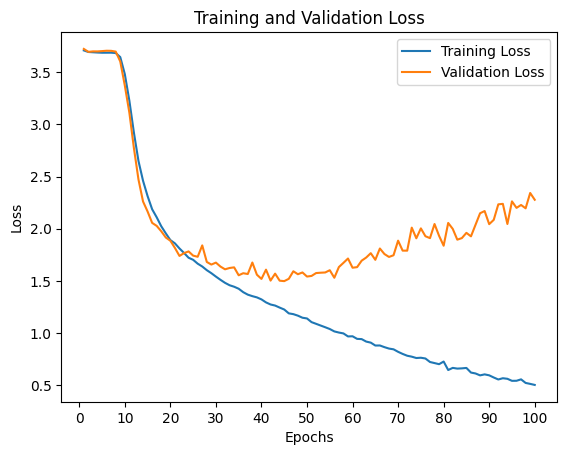

In [41]:
epochs = range(1, 101)
print(len(epochs))
# Plot and label the training and validation loss values
plt.plot(epochs, train_values, label='Training Loss')
plt.plot(epochs, val_values, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(np.arange(0, 101, 10))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [67]:
train_acc_values = torch.stack(loaded_results['train_acc']).tolist()
val_acc_values = torch.stack(loaded_results['val_acc']).tolist()
print(len(train_acc_values))
print(len(val_acc_values))

100
100


100


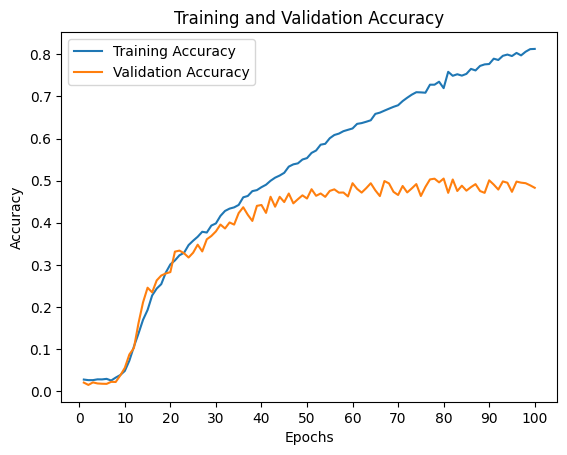

In [69]:
epochs = range(1, 101)
print(len(epochs))
# Plot and label the training and validation loss values
plt.plot(epochs, train_acc_values, label='Training Accuracy')
plt.plot(epochs, val_acc_values, label='Validation Accuracy')
 
# Add in a title and axes labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
 
# Set the tick locations
plt.xticks(np.arange(0, 101, 10))
 
# Display the plot
plt.legend(loc='best')
plt.show()